# Proyecto 2 - Inteligencia Artificial 2023

### Comisión 4 - Fredes Simón - Ilz Matias


---



# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers, Input

# Ejecutar para descargar y extraer los datasets.
!wget -O IAarchivos.zip "https://www.dropbox.com/scl/fo/unoh1g8tpy5yxdtyc1ewh/h?rlkey=dokrhmoyj9nkdgfho0k39bh26&dl=0"
!unzip /content/IAarchivos.zip -d /content/

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# Carga y análisis de datos

In [2]:
# Cargar el dataset.
df_futbol = pd.read_csv('./football_train.csv')

print("Cantidad de ejemplos: {}\nCantidad de columnas: {}".format(df_futbol.shape[0], df_futbol.shape[1]))
print()

# Nombre de las columnas
print("Columnas del dataset: {}".format(list(df_futbol.columns)))
print()

# Ver los primeros ejemplos del dataset.
df_futbol.info()

Cantidad de ejemplos: 1409
Cantidad de columnas: 23

Columnas del dataset: ['Team', 'Season', 'Matchday', 'Manager', 'Stadium', 'Stadium_capacity', 'Player_age_avg', 'Possession_%', 'Shots', 'Shots_on_target', 'Touches', 'Passes', 'Tackles', 'Clearances', 'Corners', 'Offsides', 'Fouls_conceded', 'Goals', 'ConcededGoals', 'Yellow_cards', 'Red_cards', 'Position', 'Field_zone']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team              1409 non-null   object 
 1   Season            1409 non-null   object 
 2   Matchday          1409 non-null   int64  
 3   Manager           942 non-null    object 
 4   Stadium           1409 non-null   object 
 5   Stadium_capacity  1409 non-null   int64  
 6   Player_age_avg    1409 non-null   float64
 7   Possession_%      1409 non-null   float64
 8   Shots             1409 non-null   float

# Procesamiento de los datos

In [3]:
promedio_shots_on_target = df_futbol['Shots_on_target'].mean()
print("Average Shots_on_target:", promedio_shots_on_target)

#completamos los valores nulos con el promedio de 'Shots_on_target'
df_futbol['Shots_on_target'].fillna(df_futbol['Shots_on_target'].mean(), inplace=True)

#Aplicamos hot-encoding a los 3 posibles valores de 'Field_zone'
df_futbol = pd.get_dummies(df_futbol, columns=['Field_zone'], prefix=['Field_zone'])

#aplicamos hot-encoding a los 4 posibles valores de Position
df_futbol = pd.get_dummies(df_futbol, columns=['Position'], prefix=['Position'])

cols_eliminar = ['Team', 'Stadium_capacity', 'Stadium', 'Manager','Passes','Season']
#realizamos una copia de df_futbol para luego, eliminar las columnas indeseadas
df_util = df_futbol.copy()
df_util = df_util.drop(columns = cols_eliminar)

df_util.info()
df_futbol= df_util
df_futbol
print(format(list(df_futbol.columns)))

Average Shots_on_target: 80.73109243697479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Matchday              1409 non-null   int64  
 1   Player_age_avg        1409 non-null   float64
 2   Possession_%          1409 non-null   float64
 3   Shots                 1409 non-null   float64
 4   Shots_on_target       1409 non-null   float64
 5   Touches               1409 non-null   float64
 6   Tackles               1409 non-null   float64
 7   Clearances            1409 non-null   float64
 8   Corners               1409 non-null   float64
 9   Offsides              1409 non-null   float64
 10  Fouls_conceded        1409 non-null   float64
 11  Goals                 1409 non-null   int64  
 12  ConcededGoals         1409 non-null   int64  
 13  Yellow_cards          1409 non-null   float64
 14  Red_cards             1409 no

# Desarrollo de un Árbol de Decisión

Datos de entrenamiento:
	Cantidad de ejemplos (filas): 1077
	Cantidad de atributos (columnas): 18

Datos de validación:
	Cantidad de ejemplos (filas): 120
	Cantidad de atributos (columnas): 18

Datos de test:
	Cantidad de ejemplos (filas): 212
	Cantidad de atributos (columnas): 18
Con profundidad = 1, el resultado obtenido es: 0.44 (accuracy)

Con profundidad = 2, el resultado obtenido es: 0.52 (accuracy)

Con profundidad = 4, el resultado obtenido es: 0.72 (accuracy)

Con profundidad = 8, el resultado obtenido es: 0.91 (accuracy)

Con profundidad = 10, el resultado obtenido es: 0.92 (accuracy)

LA MEJOR PROFUNDIDAD ES: 10
¿Qué profundidad tiene el árbol creado?
10

¿Cuántas hojas tiene el árbol?
88

¿Cuántos de los atributos fueron usados?
18

¿Cuántos atributos eran en total?
18

¿Qué porcentaje de aciertos tuve datos de verificación?
0.917 de accuracy (exactitud)

Reporte de clasificación

              precision    recall  f1-score   support

           0       0.90      0.87      

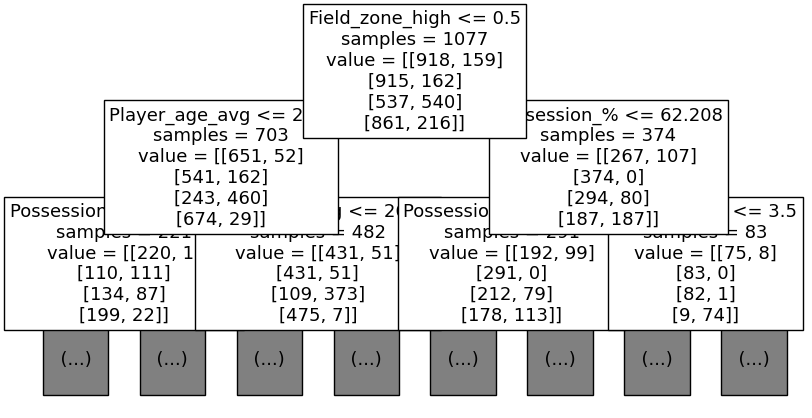

Profundidad del árbol: 10
Cantidad de nodos (internos + hojas): 175
Cantidad de hojas: 88

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.97      0.97      0.97        31
           2       0.98      0.96      0.97       114
           3       0.86      0.89      0.88        36

   micro avg       0.94      0.94      0.94       212
   macro avg       0.91      0.92      0.92       212
weighted avg       0.94      0.94      0.94       212
 samples avg       0.94      0.94      0.94       212



In [4]:
# Valores de la columna target. (lo que se desea predecir)
Y = df_futbol[['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4']].values

# Porción del dataframe con los atributos. (lo que se usara para predecir)
X = df_futbol.drop(columns = ['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4'])


# Porcentajes para datos de validación y test.
test_size = 0.15
val_size = 0.10

# La función train_test_split separa los datos (X, Y) en dos porciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, random_state = 10)

# Nos guardamos los nombres de los atributos para más adelante
feature_names = X_train.columns.values[:-1]

print("Datos de entrenamiento:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validación:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_val.shape[0], X_val.shape[1]))
print("Datos de test:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}".format(X_test.shape[0], X_test.shape[1]))

# Lista de profundidades con valores enteros.
profundidades = [1,2,4,8,10]

mejor_profundidad = 0
mejor_puntaje = 0

for prof in profundidades:
    # Para cada profundidad, se ajusta un AD con esa profundidad máxima.
    clf = DecisionTreeClassifier(max_depth= prof)

    # Se ajusta el AD con los datos de entrenamiento
    clf = clf.fit(X_train, y_train)

    # Se calcula un resultado usando el conjunto de validación
    predictions =  clf .predict(X_val)

    puntaje = accuracy_score(y_val, predictions)

    print(f"Con profundidad = {prof}, el resultado obtenido es: {round(puntaje, 2)} (accuracy)\n")

    if puntaje > mejor_puntaje:
        mejor_profundidad = prof
        mejor_puntaje = puntaje

print("LA MEJOR PROFUNDIDAD ES:", mejor_profundidad)


# Creamos un árbol de decisión (AD)
PROF = mejor_profundidad
clf = DecisionTreeClassifier(max_depth = PROF)

# Se ajusta el AD con los datos de entrenamiento
clf = clf.fit(X_train, y_train) # ajustamos el AD

print(f"¿Qué profundidad tiene el árbol creado?\n{clf.get_depth()}\n")

print(f"¿Cuántas hojas tiene el árbol?\n{clf.get_n_leaves()}\n")

print(f"¿Cuántos de los atributos fueron usados?\n{clf.n_features_in_}\n")

print(f"¿Cuántos atributos eran en total?\n{len(X_train.columns.values)}\n")

print(f"¿Qué porcentaje de aciertos tuve datos de verificación?\n{clf.score(X_val, y_val):.3} de accuracy (exactitud)\n")

print("Reporte de clasificación\n")
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

# Gráfico del árbol
feature_names = X_train.columns.values.tolist()
fig, ax = plt.subplots(figsize = (10, 5))
plot_tree(clf, max_depth = 2, fontsize = 13, feature_names = feature_names, class_names = clf.classes_, impurity = False)
plt.show()




# Creamos AD con profundidad máxima MAX
clf = DecisionTreeClassifier(max_depth = mejor_profundidad)

# Ajustamos el AD con los datos de entrenamiento
clf = clf.fit(X_train, y_train)

# Información sobre el AD aprendido
print("Profundidad del árbol: {}".format(clf.get_depth()))
print("Cantidad de nodos (internos + hojas): {}".format(clf.tree_.node_count))
print("Cantidad de hojas: {}".format(clf.get_n_leaves()))
print()

# Predicciones sobre el conjunto de test
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

# Desarrollo de una Red Neuronal Artificial

Datos de entrenamiento:
	Cantidad de ejemplos (filas): 1077
	Cantidad de atributos (columnas): 18

Datos de validación:
	Cantidad de ejemplos (filas): 120
	Cantidad de atributos (columnas): 18

Datos de test:
	Cantidad de ejemplos (filas): 212
	Cantidad de atributos (columnas): 18


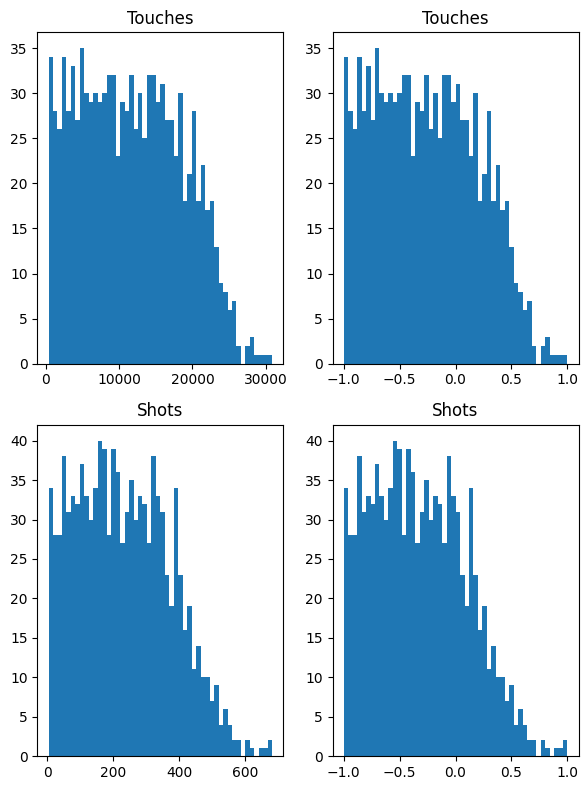

In [5]:
# Valores de la columna target. (lo que se desea predecir)
Y = df_futbol[['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4']].values

# Porción del dataframe con los atributos. (lo que se usara para predecir)
X = df_futbol.drop(columns = ['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4'])

# Porcentajes para datos de validación y test.
test_size = 0.15
val_size = 0.10

# La función train_test_split separa los datos (X, Y) en dos porciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, random_state = 10)

# Nos guardamos los nombres de los atributos para más adelante
feature_names = X_train.columns.values[:-1]

print("Datos de entrenamiento:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validación:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_val.shape[0], X_val.shape[1]))
print("Datos de test:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}".format(X_test.shape[0], X_test.shape[1]))

# MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1, 1))

# El scaler se ajusta sobre los datos de entrenamiento X_train.
X_train_scl = scaler.fit_transform(X_train)
X_val_scl = scaler.transform(X_val)
X_test_scl = scaler.transform(X_test)

# Podemos ver el conjunto de datos luego de realizar la transformación.
pd.DataFrame(X_train_scl, columns = X_train.columns).head()



# que atributos me interesan mostrar, releer libreria sci
fig, axs = plt.subplots(2,2, figsize  = (6, 8))

# Gráficas para el atributo Touches (antes de la transformación (izq) y después (der)).
axs[0, 0].hist(X_train['Touches'], bins = 50)
axs[0, 0].set_title("Touches")
axs[0, 1].hist(X_train_scl[:, 5], bins = 50)
axs[0, 1].set_title("Touches")

# Gráficas para el atributo Shots (antes de la transformación (izq) y después (der)).
axs[1, 0].hist(X_train['Shots'], bins = 50)
axs[1, 0].set_title("Shots")
axs[1, 1].hist(X_train_scl[:, 3], bins = 50)
axs[1, 1].set_title("Shots")
plt.tight_layout()
plt.show()


Desarrollamos la RNA

In [6]:
# Desarrollo de una Red Neuronal Artificial
num_features = X_train_scl.shape[1] ## cantidad de atributos en X_train y X_val
num_outputs = y_train.shape[1] ## cantidad de categorías posibles (4 clases)


def define_model_dummy():
    model = Sequential()

    # Capa de entrada de la red
    model.add(Input(shape=(num_features ))) ## tamaño de la entrada a la RNA

    # activation = ['relu', 'sigmoid', 'tanh']
    model.add(layers.Dense(1000, activation = 'relu'))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(1000, activation='sigmoid'))


    # Capa de salida de la red
    model.add(layers.Dense(num_outputs, activation = 'softmax'))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy', metrics = 'accuracy')
    return model

def define_model():
    model = Sequential()

    # Capa de entrada de la red
    model.add(Input(shape=(num_features )))

    model.add(layers.Dense(1000, activation = 'sigmoid'))

    model.add(layers.Dense(1000, activation = 'sigmoid'))

    # Capa de salida de la red
    model.add(layers.Dense(num_outputs, activation = 'softmax'))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy', metrics = 'accuracy')
    return model

print("¡Estructura de la red definida!\n")

# Se crea el modelo, aún sin entrenar
model = define_model_dummy()

# Obtenemos una descripción de la estructura
model.summary()

¡Estructura de la red definida!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              19000     
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 2025004 (7.72 MB)
Trainable params: 2025004 (7.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Configuración de parámetros
eps = 50  # Número de épocas
bs = 64   # Tamaño del lote

# Un tamaño de lote más pequeño puede acelerar el entrenamiento, pero valores muy pequeños pueden resultar en una estimación menos estable de los gradientes.
# Entrenar la RNA
history = model.fit(X_train_scl, y_train, batch_size=bs, epochs=eps, validation_data=(X_val_scl, y_val))

Epoch 1/50
17/17 [==============================] - 2s 55ms/step - loss: 1.0609 - accuracy: 0.5469 - val_loss: 0.7558 - val_accuracy: 0.6083
Epoch 2/50
17/17 [==============================] - 1s 40ms/step - loss: 0.6743 - accuracy: 0.7140 - val_loss: 0.6542 - val_accuracy: 0.7083
Epoch 3/50
17/17 [==============================] - 1s 41ms/step - loss: 0.5077 - accuracy: 0.7846 - val_loss: 0.4344 - val_accuracy: 0.8000
Epoch 4/50
17/17 [==============================] - 1s 45ms/step - loss: 0.3626 - accuracy: 0.8487 - val_loss: 0.2821 - val_accuracy: 0.8833
Epoch 5/50
17/17 [==============================] - 1s 49ms/step - loss: 0.2637 - accuracy: 0.8997 - val_loss: 0.2128 - val_accuracy: 0.9250
Epoch 6/50
17/17 [==============================] - 1s 44ms/step - loss: 0.2175 - accuracy: 0.9229 - val_loss: 0.1994 - val_accuracy: 0.9167
Epoch 7/50
17/17 [==============================] - 1s 46ms/step - loss: 0.2063 - accuracy: 0.9183 - val_loss: 0.2576 - val_accuracy: 0.9000
Epoch 8/50
17

Analizamos la funcion de perdida y la precision


---

Nos informa que tan mal estan los resultados a partir de cada iteracion.

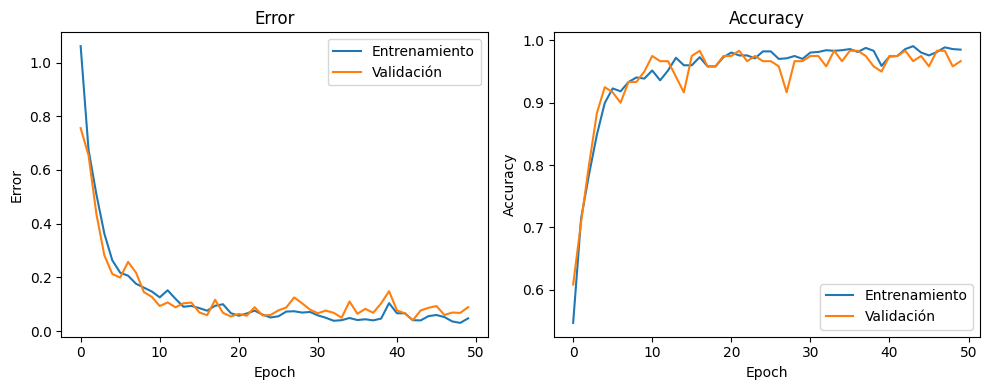

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Error
ax1.plot(history.history['loss'], label='Entrenamiento')
ax1.plot(history.history['val_loss'], label='Validación')
ax1.set_title('Error')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.legend()

# Accuracy
ax2.plot(history.history['accuracy'], label='Entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Validación')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [9]:
print("Haciendo predicciones")
result = model.predict([X_test_scl])
print(classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(result, axis = 1),
                            target_names =  ['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4']))
print(result)

Haciendo predicciones
7/7 [==============================] - 0s 5ms/step
                      precision    recall  f1-score   support

      Position_4-a-7       0.81      0.97      0.88        31
   Position_descenso       0.97      0.97      0.97        31
Position_media-tabla       0.99      0.96      0.97       114
      Position_top-4       0.97      0.92      0.94        36

            accuracy                           0.95       212
           macro avg       0.94      0.95      0.94       212
        weighted avg       0.96      0.95      0.95       212

[[1.81075407e-07 1.08399838e-10 2.18503687e-12 9.99999762e-01]
 [9.99995112e-01 2.94425817e-09 2.51655138e-06 2.38842654e-06]
 [7.74180705e-07 2.70740541e-10 9.99999285e-01 1.43561482e-10]
 [8.33095014e-01 7.39172176e-02 1.10437432e-02 8.19439441e-02]
 [9.99932885e-01 1.96888095e-07 2.93277367e-07 6.66679698e-05]
 [9.99996543e-01 1.21147892e-07 1.69891257e-06 1.66688551e-06]
 [4.97115252e-05 7.92980063e-05 9.99863029e-01 7.9

Cargamos el archivo test

In [10]:
# Cargar el dataset.
df_futbol_test = pd.read_csv('./football_test.csv')

print("Cantidad de ejemplos: {}\nCantidad de columnas: {}".format(df_futbol_test.shape[0], df_futbol_test.shape[1]))
print()

# Nombre de las columnas
print("Columnas del dataset: {}".format(list(df_futbol_test.columns)))
print()

# Listado de primeros 10 elementos del dataset
print(df_futbol_test.head(10))
#print()
# Ver los primeros ejemplos del dataset.
print(df_futbol_test.info())

Cantidad de ejemplos: 20
Cantidad de columnas: 22

Columnas del dataset: ['Team', 'Season', 'Matchday', 'Manager', 'Stadium', 'Stadium_capacity', 'Player_age_avg', 'Possession_%', 'Shots', 'Shots_on_target', 'Touches', 'Passes', 'Tackles', 'Clearances', 'Corners', 'Offsides', 'Fouls_conceded', 'Goals', 'ConcededGoals', 'Yellow_cards', 'Red_cards', 'Field_zone']

             Team Season  Matchday        Manager                    Stadium  \
0       Newcastle  23-24         8     Eddie Howe             St James' Park   
1        West Ham  23-24         8    David Moyes             London Stadium   
2         Arsenal  23-24         8   Mikel Arteta           Emirates Stadium   
3         Everton  23-24         8     Sean Dyche              Goodison Park   
4         Man Utd  23-24         8   Erik ten Hag               Old Trafford   
5  Crystal Palace  23-24         8            NaN              Selhurst Park   
6           Spurs  23-24         8            NaN  Tottenham Hotspur Stadiu

Procesamiento de datos

In [11]:
promedio_shots_on_target = df_futbol_test['Shots_on_target'].mean()
print("Average Shots_on_target:", promedio_shots_on_target)

#completamos los valores nulos con el promedio de 'Shots_on_target'
df_futbol_test['Shots_on_target'].fillna(df_futbol_test['Shots_on_target'].mean(), inplace=True)

#Aplicamos hot-encoding a los 3 posibles valores de 'Field_zone'
df_futbol_test = pd.get_dummies(df_futbol_test, columns=['Field_zone'], prefix=['Field_zone'])

cols_eliminar = ['Team', 'Stadium_capacity', 'Stadium', 'Manager','Passes','Season']
#realizamos una copia de df_fubol_test para luego, eliminar las columnas indeseadas
df_util2 = df_futbol_test.copy()
df_util2 = df_util2.drop(columns = cols_eliminar)

df_util2.info()
df_futbol_test= df_util2
df_futbol_test
print(format(list(df_futbol_test.columns)))

Average Shots_on_target: 37.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matchday           20 non-null     int64  
 1   Player_age_avg     20 non-null     float64
 2   Possession_%       20 non-null     float64
 3   Shots              20 non-null     float64
 4   Shots_on_target    20 non-null     float64
 5   Touches            20 non-null     float64
 6   Tackles            20 non-null     float64
 7   Clearances         20 non-null     float64
 8   Corners            20 non-null     float64
 9   Offsides           20 non-null     float64
 10  Fouls_conceded     20 non-null     float64
 11  Goals              20 non-null     int64  
 12  ConcededGoals      20 non-null     int64  
 13  Yellow_cards       20 non-null     float64
 14  Red_cards          20 non-null     float64
 15  Field_zone_high    20 non-null     bool   
 16

In [12]:
print("Haciendo predicciones del arbol")
predicciones_arbol = clf.predict(df_futbol_test)

df = pd.DataFrame(predicciones_arbol, columns=['A', 'B', 'C', 'D'])

# Diccionario de mapeo
mapeo_coordenadas = {
    (1, 0, 0, 0): '4-a-7',
    (0, 1, 0, 0): 'descenso',
    (0, 0, 1, 0): 'media-tabla',
    (0, 0, 0, 1): 'top-4'
}

# Función para aplicar el mapeo a cada fila
def aplicar_mapeo(fila):
    return mapeo_coordenadas[tuple(fila)]

# Aplicar el mapeo a cada fila del DataFrame
df['Nuevo_Valor'] = df.apply(aplicar_mapeo, axis=1)

# Mostrar el DataFrame resultante
print(df['Nuevo_Valor'])
#predicciones_arbol['Predicciones Arbol'] = df['Predicciones Arbol'].map(mapeo_coordenadas)
#print(predicciones_arbol)

Haciendo predicciones del arbol
0           4-a-7
1     media-tabla
2           top-4
3     media-tabla
4           top-4
5     media-tabla
6           4-a-7
7        descenso
8     media-tabla
9     media-tabla
10          4-a-7
11          4-a-7
12          4-a-7
13          top-4
14    media-tabla
15    media-tabla
16    media-tabla
17    media-tabla
18          top-4
19    media-tabla
Name: Nuevo_Valor, dtype: object


In [13]:
## MinMaxScaler para el predict de la RNA
scaler = MinMaxScaler(feature_range = (-1, 1))

# El scaler se ajusta sobre los datos de validacion df_futbol_test.
df_test_scal = scaler.fit_transform(df_futbol_test)

In [14]:
print("Haciendo predicciones en la RNA...")
predicciones_red_neuronal = model.predict(df_test_scal)

# Limitar la cantidad de predicciones a 20
max_predicciones = 20
clases_predichas_red_neuronal = np.argmax(predicciones_red_neuronal, axis=1)[:max_predicciones]

etiquetas_originales = np.array(["4-a-7", "descenso", "media-tabla", "top-4"])

etiquetas_predichas_red_neuronal = etiquetas_originales[clases_predichas_red_neuronal]

print(etiquetas_predichas_red_neuronal)


Haciendo predicciones en la RNA...


1/1 [==============================] - 0s 86ms/step
['top-4' 'media-tabla' 'top-4' 'media-tabla' '4-a-7' 'media-tabla' 'top-4'
 'descenso' 'media-tabla' 'descenso' 'top-4' 'media-tabla' '4-a-7' 'top-4'
 'media-tabla' 'descenso' 'descenso' 'media-tabla' 'top-4' 'top-4']


In [15]:
print("Agregando columnas de predicciones al archivo test...")
df_test_entrega = pd.read_csv('./football_test.csv')

#print(predicciones_arbol)

df_test_entrega['Predicciones Arbol'] = df['Nuevo_Valor']

df_test_entrega['Predicciones RNA'] = etiquetas_predichas_red_neuronal

# Guardamos el dataframe como un archivo csv.
# Vas a encontrar el archivo csv en la parte de "Archivos" en el panel de la izquierda.
df_test_entrega.to_csv('df_test_entrega.csv', index = False)
#df_test_entrega.head(60)
df_print = df_test_entrega[['Team', 'Predicciones Arbol','Predicciones RNA']]
df_print.head(20)

Agregando columnas de predicciones al archivo test...


,Team,Predicciones Arbol,Predicciones RNA
0,Newcastle,4-a-7,top-4
1,West Ham,media-tabla,media-tabla
2,Arsenal,top-4,top-4
3,Everton,media-tabla,media-tabla
4,Man Utd,top-4,4-a-7
5,Crystal Palace,media-tabla,media-tabla
6,Spurs,4-a-7,top-4
7,Sheffield Utd,descenso,descenso
8,Luton,media-tabla,media-tabla
9,Bournemouth,media-tabla,descenso
